In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.ticker as ticker
import scipy

In [3]:
table = pd.read_excel('D:\\Data2.xlsx', usecols=['Год','Месяц','День','Час','Энергия_излуч.','Нагрузка'])

In [4]:
table.head(50)

,Год,Месяц,День,Час,Энергия_излуч.,Нагрузка
0,2005,1,1,1,0,0.45
1,2005,1,1,2,0,0.05
2,2005,1,1,3,0,0.05
3,2005,1,1,4,0,0.05
4,2005,1,1,5,0,0.45
5,2005,1,1,6,0,0.23
6,2005,1,1,7,0,0.08
7,2005,1,1,8,0,1.97
8,2005,1,1,9,0,1.70
9,2005,1,1,10,0,1.80


In [11]:
Max_Row = table.shape[0]
E_ey = np.zeros(Max_Row)
P = np.zeros(Max_Row)
P_max = np.max(table['Нагрузка'])

In [6]:
Nu_i = 1
a1 = 0.0010332   #Nu_ey_x
b1 = 0.73#1.422768  Nu_ey_c 
a2 = 0.00087737  #Nu_te_x
b2 = 0.5691056    #Nu_te_c
N_max = 6000
E_ey_nom = 12.5
p_nom = 4
S = 200

In [12]:
table2=table.copy()
de_plus = []
de_minus = []
for i in range(0,Max_Row):
        E_ey[i] = table['Энергия_излуч.'].iloc[i]*S/1000000
        P[i] = table['Нагрузка'].iloc[i]
        dE = (E_ey[i]*N_min-P[i])
        if dE>0:
            de_plus.append(dE*Nu_i*(a1*(E_ey_nom-E_ey[i]*N_min)+b1))
            de_minus.append(0)
        elif dE<0:
            de_minus.append(-dE/(Nu_i*(a2*(np.round_(P_max)-P[i])+b2)))
            de_plus.append(0)
table2['+dE'] =de_plus
table2['-dE'] =de_minus
table2.head(50)

,Год,Месяц,День,Час,Энергия_излуч.,Нагрузка,+dE,-dE
0,2005,1,1,1,0,0.45,0.000000,0.787618
1,2005,1,1,2,0,0.05,0.000000,0.087459
2,2005,1,1,3,0,0.05,0.000000,0.087459
3,2005,1,1,4,0,0.05,0.000000,0.087459
4,2005,1,1,5,0,0.45,0.000000,0.787618
5,2005,1,1,6,0,0.23,0.000000,0.402424
6,2005,1,1,7,0,0.08,0.000000,0.139941
7,2005,1,1,8,0,1.97,0.000000,3.456084
8,2005,1,1,9,0,1.70,0.000000,2.981169
9,2005,1,1,10,0,1.80,0.000000,3.157017


In [14]:
table2.iloc[0,0]

2005

In [497]:
np.sum(table2['+dE'])-np.sum(table2['-dE'])

131.20991729793695

In [8]:
def CalcD_n(table, n):
    F1 = 0
    F2 = 0
    P_max = np.max(table['Нагрузка'])
    for i in range(0,Max_Row):
        E_ey[i] = (table['Энергия_излуч.'].iloc[i]+table['Энергия_излуч.'].iloc[i-1])/2*S/1000000
        P[i] = (table['Нагрузка'].iloc[i]+table['Нагрузка'].iloc[i-1])/2
        dE = E_ey[i]*n-P[i]*Nu_i
        if dE>0:
            F1+= dE*(a1*(dE-12) + b1)
        if dE<0:
            F2+= -dE/(a2*(P_max-dE) + b2)
    D_n = np.abs((F1-F2))
    return D_n

In [9]:
phi = (1+math.sqrt(5))/2
right = N_max
left = 0
x2 = right - (right - left) / (phi+1)
x1 = left + (right - left) / (phi+1)

D1 = CalcD_n(table, x1)
D2 = CalcD_n(table, x2)
while np.abs(x1-x2)>0.5:
    if (D1<D2):
        right = x2
        x2 = x1
        D2 = D1
        x1 = left + (right - left) / (phi+1)
        D1 = CalcD_n(table, x1)
    elif (D1>=D2):
        left = x1
        x1 = x2
        D1 = D2
        x2 = right - (right - left) / (phi+1)
        D2 = CalcD_n(table, x2) 
    print(x1,x2)
N_min=(left+right)/2
N_min = math.ceil(N_min)
print(N_min)


1416.4078649987382 2291.7960675006307
875.3882025018926 1416.4078649987382
541.0196624968454 875.3882025018926
334.36854000504724 541.0196624968454
206.65112249179813 334.36854000504724
127.7174175132491 206.65112249179813
78.93370497854902 127.7174175132491
48.78371253470008 78.93370497854902
30.149992443848934 48.78371253470008
48.78371253470008 60.29998488769787
41.66626479684672 48.78371253470008
48.78371253470008 53.18253714984451
53.18253714984451 55.90116027255344
51.50233565740901 53.18253714984451
50.46391402713557 51.50233565740901
51.50233565740901 52.14411551957107
52.14411551957107 52.540757287682446
53


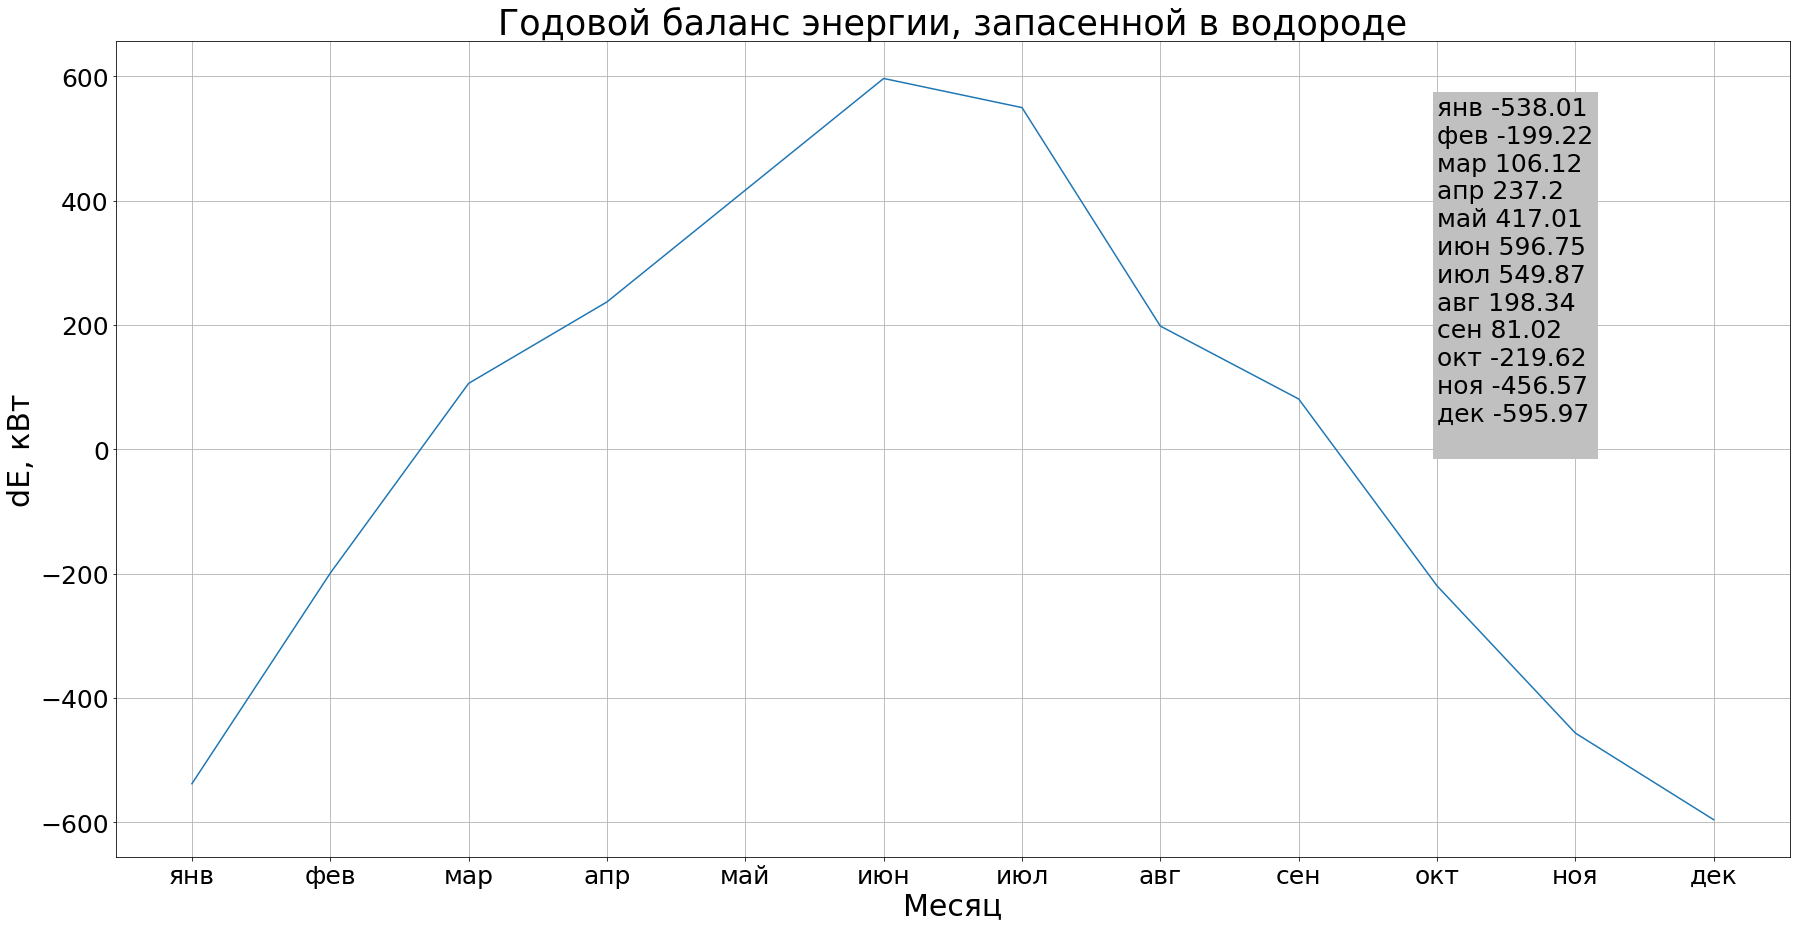

176.91441037530137


In [498]:
def get_year_balance(table, n):
    y = []
    x = ['янв','фев','мар','апр','май','июн','июл','авг','сен','окт','ноя','дек']
    P_max = np.max(table['Нагрузка'])
    for i in range(0,12):
        data = table.loc[table['Месяц']==(i+1)]
        F1 = 0
        F2 = 0
        for i in range(0,data.shape[0]):
            E_ey[i] = (data['Энергия_излуч.'].iloc[i]+data['Энергия_излуч.'].iloc[i-1])/2*S/1000000
            P[i] = (data['Нагрузка'].iloc[i]+data['Нагрузка'].iloc[i-1])/2
            dE = E_ey[i]*n-P[i]*Nu_i
            if dE>0:
                F1+= dE*(a1*(dE-12.5) + b1)
            if dE<0:
                F2+= -dE/(a2*(P_max-dE) + b2)
        y.append(F1-F2)
    fig = plt.figure(figsize=(30,15))
    ax = fig.add_subplot()
    ax.set_title('Годовой баланс энергии, запасенной в водороде', fontsize = 35)
    ax.set_xlabel('Месяц', fontsize=30)
    ax.set_ylabel('dE, кВт', fontsize=30)
    df = pd.DataFrame(data = y, columns = ['dE'])
    df['Месяц'] = x
    t = ""
    for i in range(0,12):
       t += df.iloc[i]['Месяц']+' '+str(np.round_(df.iloc[i]['dE'],2))+'\n'
    ax.text(9, 1, t, ha='left', fontsize = 25, backgroundcolor = '#C0C0C0')
    ax.grid()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 25)
    ax.plot(x,y)
    plt.show()
    print(np.sum(y))
get_year_balance(table, 53)        

In [499]:
def most_favorable_day(table):
    data=table.drop(columns=['Час']).groupby(by = ['Год','Месяц','День']).sum()
    return np.array(data.loc[data['Энергия_излуч.']==np.max(data['Энергия_излуч.'])].index)[0]

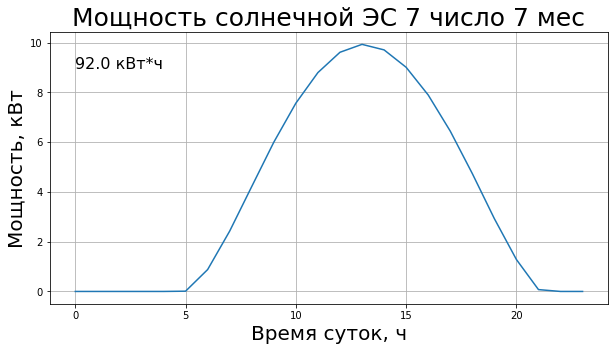

In [503]:
def get_daily_power(month, day, table, n):
    data = table.loc[(table['День'] == day) & (table['Месяц'] == month)]
    y = []
    sum_ = 0
    for power in data['Энергия_излуч.']:
        y.append(power*S/1000000*n)
        sum_ +=power*S/1000000*n
    x = [i for i in range(0, data['Энергия_излуч.'].shape[0])]
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()
    ax.set_title('Мощность солнечной ЭС ' + str(day) + ' число ' + str(month) + ' мес', fontsize = 25)
    ax.set_xlabel('Время суток, ч', fontsize=20)
    ax.set_ylabel('Мощность, кВт', fontsize=20)
    ax.grid()
    ax.annotate(str(np.round_(sum_))+" кВт*ч", xy=(0, (np.max(y)-np.min(y))/10*9), fontsize = 16)
    ax.plot(x,y)
    plt.show()
get_daily_power(most_favorable_day(table)[1], most_favorable_day(table)[2], table, N_min)

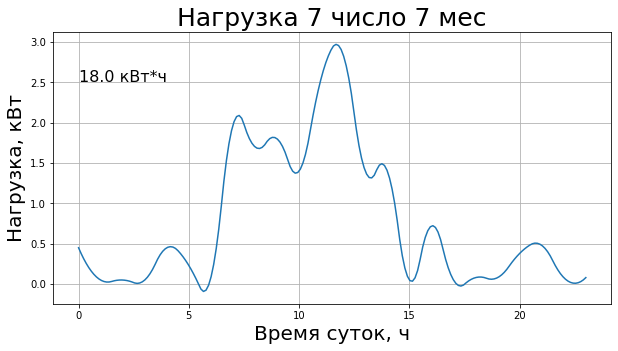

In [501]:
def get_daily_workload(month, day, table):
    data = table.loc[(table['День'] == day) & (table['Месяц'] == month)]
    y = []
    sum_=0
    for wkload in data['Нагрузка']:
        sum_+=wkload
        y.append(wkload)
    x = [i for i in range(0, data['Нагрузка'].shape[0])]
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()
    ax.set_title('Нагрузка ' + str(day) + ' число ' + str(month) + ' мес', fontsize = 25)
    ax.set_xlabel('Время суток, ч', fontsize=20)
    ax.set_ylabel('Нагрузка, кВт', fontsize=20)
    ax.annotate(str(np.round_(sum_))+" кВт*ч", xy=(0, (np.max(y)-np.min(y))/10*9), fontsize = 16)
    ax.grid()
    spl = scipy.interpolate.make_interp_spline(x, y, k=2)
    xnew = np.linspace(np.min(x), np.max(x), 200)
    ysmooth = spl(xnew)
    ax.plot(xnew,ysmooth)
    plt.show()
get_daily_workload(most_favorable_day(table)[1], most_favorable_day(table)[2], table)

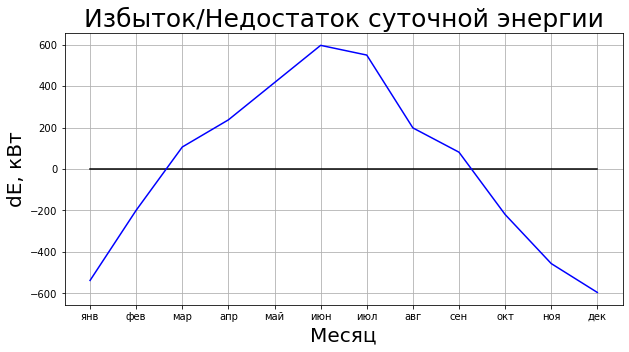

In [505]:
def get_year_dE(table, n):
    y = []
    x = ['янв','фев','мар','апр','май','июн','июл','авг','сен','окт','ноя','дек']
    P_max = np.max(table['Нагрузка'])
    for i in range(0,12):
        data = table.loc[table['Месяц']==(i+1)]
        F1 = 0
        F2 = 0
        for i in range(0,data.shape[0]):
            E_ey[i] = (data['Энергия_излуч.'].iloc[i]+data['Энергия_излуч.'].iloc[i-1])/2*S/1000000
            P[i] = (data['Нагрузка'].iloc[i]+data['Нагрузка'].iloc[i-1])/2
            dE = E_ey[i]*N_min-P[i]*Nu_i
            if dE>0:
                F1+= dE*(a1*(dE-12.5) + b1)
            if dE<0:
                F2+= -dE/(a2*(P_max-dE) + b2)
        y.append(F1-F2)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()
    ax.set_title('Избыток/Недостаток суточной энергии', fontsize = 25)
    ax.set_xlabel('Месяц', fontsize=20)
    ax.set_ylabel('dE, кВт', fontsize=20)
    ax.grid()
    ax.plot(x,np.zeros(12),color = 'black')
    ax.plot(x,y, color = 'blue')
    plt.show()
get_year_dE(table, N_min)        

In [531]:
def Calc_ey_efficiency(table, A_v, n):
    y = []
    for i in range(0, table.shape[0]):
        y.append(table['Энергия_излуч.'].iloc[i]*S/1000000*n-P[i])
    return np.max(y)/A_v
Calc_ey_efficiency(table, 4.9, N_min)

1.8285714285714283

In [532]:
def Calc_ey_num(table, A_v, n, eff):
    return np.round_(Calc_ey_efficiency(table, A_v, n)/eff)
Calc_ey_num(table, 4.9, N_min, 2)

1.0

In [533]:
def Calc_te_num(table, n, n_te_nom):
    y = []
    for i in range(0, table.shape[0]):
        P = table['Нагрузка'].iloc[i]
        y.append((table['Энергия_излуч.'].iloc[i]*S/1000000*n-P*Nu_i))
    return np.round_(np.abs(np.min(y))/n_te_nom)
Calc_te_num(table, N_min, 2.4)

1.0

In [535]:
def Calc_num_balloon(table, A_v, n):
    for i in range(0,12):
        data = table.loc[table['Месяц']==(i+1)]
        F1 = 0
        F2 = 0
        for i in range(0,data.shape[0]):
            E_ey[i] = (data['Энергия_излуч.'].iloc[i]+data['Энергия_излуч.'].iloc[i-1])/2*S/1000000
            P[i] = (data['Нагрузка'].iloc[i]+data['Нагрузка'].iloc[i-1])/2
            dE = E_ey[i]*n-P[i]*Nu_i
            if dE>0:
                F1+= dE*(a1*(dE-12.5) + b1)
            if dE<0:
                F2+= -dE/(a2*(P_max-dE) + b2)
        y.append(F1-F2)
    ro_h2 = 0.089
    return np.max(y)*ro_h2/A_v
Calc_num_balloon(table, 4.9, N_min)

10.838861102646954

In [538]:
def Calc_max_mass(table, p_h2, v_bal, A_v, n):
    for i in range(0,12):
        data = table.loc[table['Месяц']==(i+1)]
        F1 = 0
        F2 = 0
        for i in range(0,data.shape[0]):
            E_ey[i] = (data['Энергия_излуч.'].iloc[i]+data['Энергия_излуч.'].iloc[i-1])/2*S/1000000
            P[i] = (data['Нагрузка'].iloc[i]+data['Нагрузка'].iloc[i-1])/2
            dE = E_ey[i]*n-P[i]*Nu_i
            if dE>0:
                F1+= dE*(a1*(dE-12.5) + b1)
            if dE<0:
                F2+= -dE/(a2*(P_max-dE) + b2)
        y.append(F1-F2)
    return np.round_(np.max(y)/(p_h2*v_bal*A_v))
Calc_max_mass(table, 200, 0.05, 4.9, N_min)

12.0